# Project: Stroke Classification

author: Jingru Zhang

In [2]:
# import libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## 1. Introduction

A stroke is a serious life-threatening medical condition that happens when the blood supply to part of the brain is cut off. Strokes are a medical emergency and urgent treatment is essential, the sooner a person receives treatment for a stroke, the less damage is likely to happen. (Credit to NHS UK https://www.nhs.uk/conditions/stroke/). According to CDC (https://www.cdc.gov/stroke/facts.htm), someone in the United States has stroke every 40 seconds, and every 4 minutes, someone dies of stroke. Every year, more than 795,000 people in the United States have a stroke. About 610,000 of these are first or new strokes. About 185,000 strokes, nearly 1 of 4, are in people who have had a previous stroke. Stroke-related costs in the United States came to nearly $46 billion between 2014 and 2015. This total includes the cost of health care services, medicines to treat stroke, and missed days of work. Stroke is also a leading cause of serious long-term disability. Stroke reduces mobility in more than half of stroke survivors age 65 and over. Because of the life-threatening nature of stroke, it is extremely important to take early action. Know the warning signs and symptoms of stroke so that one can act fast if you or someone you know might be having a stroke. The chances of survival are greater when emergency treatment begins quickly. In addition, high blood pressure, high cholesterol, smoking, obesity and diabetes are generally regarded as leading causes of stroke, while 1 in 3 adults in the United States has at least one of these conditions, making the prediction of stroke risk even more important as compared to other population without these conditions.

## 2. Data

The stroke dataset I used in this project is from Kaggle. The dataset has the following attribute information:
- id: unique identifier
- gender: "Male", "Female" or "Other"
- age: age of the patient
- hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
- heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
- ever_married: "No" or "Yes"
- work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
- Residence_type: "Rural" or "Urban"
- avg_glucose_level: average glucose level in blood
- bmi: body mass index
- smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"
- stroke: 1 if the patient had a stroke or 0 if not


The “Other” in gender means people who identify their gender other than “Male” or “Female”, the “Unknown” in smoking_status indicates the corresponding information is unavailable for this person.


## 3. Task

Given the attributes in the dataset, the “stroke” is the target variable, and the rest except the “id” will be the independent variables, the target of the project is to provide an accurate model to predict the stroke risk using the independent variables. If an accurate model can be achieved, since the independent variables can be obtained for every patient at admission, it would provide a convenient way to mitigate the damage of stroke.

## 4. Exploratory Data Analysis

In [3]:
# load scaped dataset and display the first 5 rows.

data_orig = pd.read_csv('F:/Data Science/Applied Data Science/Project1/healthcare-dataset-stroke-data.csv')
data_orig.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
# make a copy of the dataset

data = data_orig.copy()

In [4]:
# repalace 0/1 with strings for plot

data.stroke = data.stroke.apply(lambda x: 'Stroke' if x==1 else 'Not Stroke')

In [5]:
# display info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 479.2+ KB


In [6]:
# display basic statistics for numerical attributes

data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000


In [28]:
# drop "id"

data_orig.duplicated().sum()

0

In [7]:
# check the missing value

data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
# gender value counts

data.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

Text(0.5, 0, 'Patient Type')

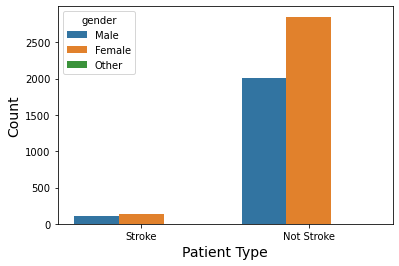

In [9]:
# bar plot for gender

sns.countplot(x='stroke', hue='gender', data=data)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Patient Type', fontsize=14)

Text(0.5, 0, 'Stroke')

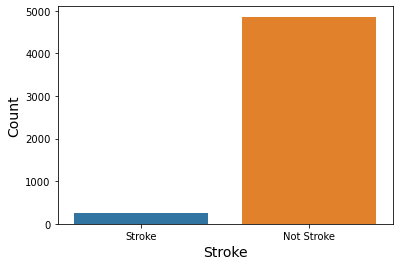

In [10]:
# bar plot for stroke

sns.countplot(x='stroke',data=data)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Stroke', fontsize=14)

([<matplotlib.patches.Wedge at 0x182c2065588>,
 [Text(-0.23767897635696644, 1.1251705222755815, 'Female'),
  Text(0.2376789763569666, -1.1251705222755815, 'Male')],
 [Text(-0.11367255390985352, 0.5381250323926694, '56.6%'),
  Text(0.11367255390985358, -0.5381250323926694, '43.4%')])

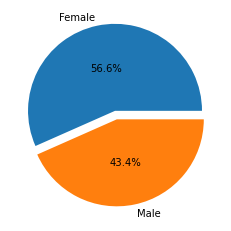

In [11]:
# pie chart for male and female with stroke

plt.pie(data_orig.query('stroke == 1').gender.value_counts(), autopct="%.1f%%", labels=['Female', 'Male'], pctdistance=0.5, 
        explode=[0.05]*2)

Text(0.5, 0, 'Age')

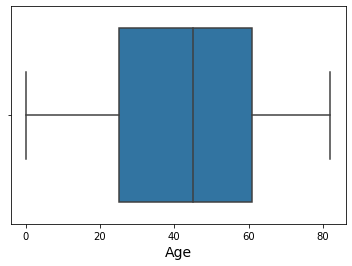

In [12]:
# box plot for age

sns.boxplot(x='age', data=data)
plt.xlabel('Age', fontsize=14)

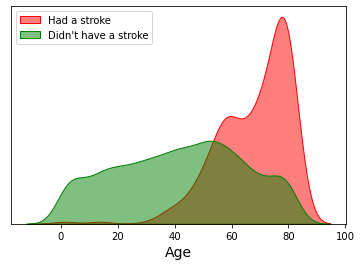

In [13]:
# age distribution plot 

sns.kdeplot(data_orig.query('stroke == 1')['age'], color = 'red', shade = True, label = 'Had a stroke', alpha = 0.5)
sns.kdeplot(data_orig.query('stroke == 0')['age'], color = 'green', shade = True, label = "Didn't have a stroke", alpha = 0.5)
plt.ylabel('')
plt.xlabel('Age', fontsize=14)
plt.yticks([])
plt.legend(loc = 'upper left')

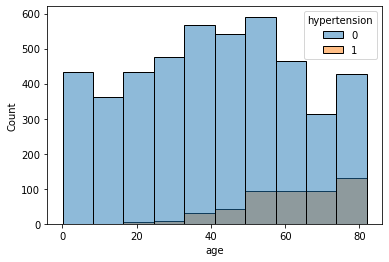

In [14]:
# histgram plot of age versus hypertension

sns.histplot(x='age',data=data, hue='hypertension', bins=10)

Text(0.5, 0, 'Patient Type')

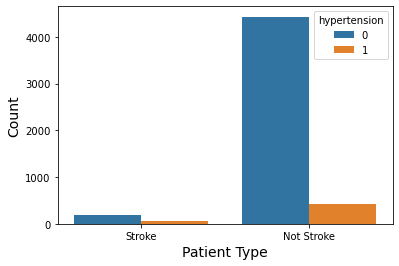

In [15]:
# bar plot for hypertension

sns.countplot(x='stroke', hue='hypertension', data=data)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Patient Type', fontsize=14)

([<matplotlib.patches.Wedge at 0x182c22b78c8>,
 [Text(-0.7738033895938559, 0.8507222309620571, 'No Hypertension'),
  Text(0.7738033895938552, -0.8507222309620575, 'Hypertension')],
 [Text(-0.3700798819796701, 0.40686715393837514, '73.5%'),
  Text(0.3700798819796699, -0.4068671539383753, '26.5%')])

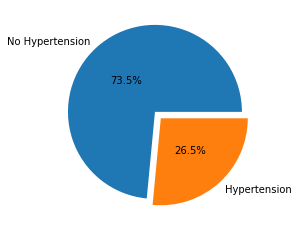

In [16]:
# pie chart for hypertension 

plt.pie(data_orig.query('stroke == 1').hypertension.value_counts(), autopct="%.1f%%", labels=['No Hypertension','Hypertension'], 
        pctdistance=0.5, explode=[0.05]*2)

Text(0.5, 0, 'Patient Type')

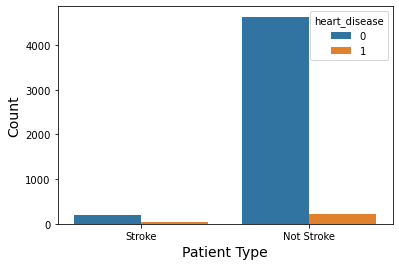

In [17]:
# bar plot for heart_disease

sns.countplot(x='stroke', hue='heart_disease', data=data)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Patient Type', fontsize=14)

Text(0.5, 0, 'Patient Type')

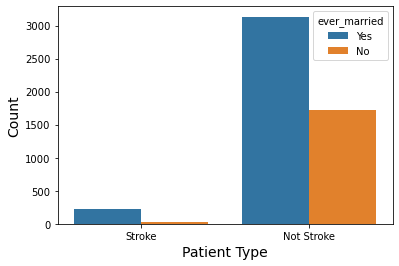

In [18]:
# bar plot for ever_married

sns.countplot(x='stroke', hue='ever_married', data=data)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Patient Type', fontsize=14)

([<matplotlib.patches.Wedge at 0x182c23d4588>,
 [Text(-1.0738772573481417, 0.4114457876202324, 'Married'),
  Text(1.0738772573481417, -0.41144578762023204, 'Single')],
 [Text(-0.5135934709056329, 0.19677842016619806, '88.4%'),
  Text(0.513593470905633, -0.1967784201661979, '11.6%')])

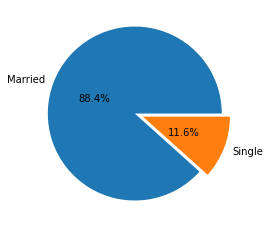

In [19]:
# pie chart for poeple with different marital status with stroke

plt.pie(data_orig.query('stroke == 1').ever_married.value_counts(), autopct="%.1f%%", labels=['Married', 'Single'], pctdistance=0.5,
        explode=[0.05]*2)

Text(0.5, 0, 'Work Type')

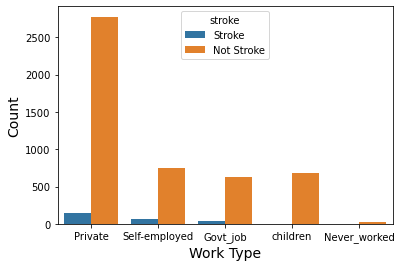

In [20]:
# bar plot for work_type

sns.countplot(x='work_type', hue='stroke',data=data)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Work Type', fontsize=14)

([<matplotlib.patches.Wedge at 0x182c3471a48>,
 [Text(-0.3498453004019864, 1.0954945302404044, 'Private'),
  Text(-0.1519032023305216, -1.1399234259904183, 'Self-employed'),
  Text(1.0269529429408382, -0.5175593231554734, 'Govt_job'),
  Text(1.1496338921567373, -0.029015754419823663, 'Chindren')],
 [Text(-0.1673173175835587, 0.523932166636715, '59.8%'),
  Text(-0.0726493576363364, -0.5451807689519391, '26.1%'),
  Text(0.4911514074934443, -0.247528371943922, '13.3%'),
  Text(0.5498249049445265, -0.013877099939915665, '0.8%')])

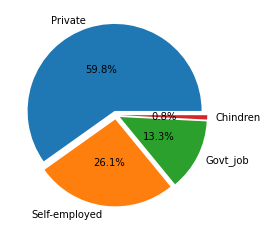

In [21]:
# pie chart for poeple with different jobs with stroke

plt.pie(data_orig.query('stroke == 1').work_type.value_counts(), autopct="%.1f%%", labels=['Private', 'Self-employed', 'Govt_job', 'Chindren'], 
        pctdistance=0.5, explode=[0.05]*4)

Text(0.5, 0, 'Patient Type')

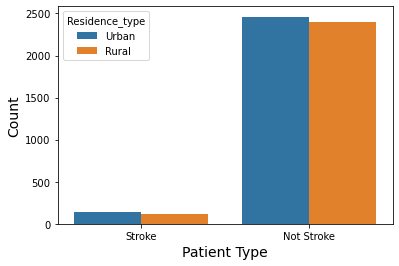

In [22]:
# bar plot for Residence_type

sns.countplot(x='stroke', hue='Residence_type', data=data)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Patient Type', fontsize=14)

Text(0.5, 0, 'Average Glucose Level')

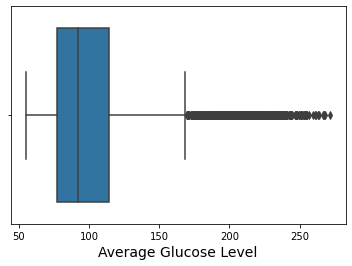

In [23]:
# box plot for avg_glucose_level

sns.boxplot(x ='avg_glucose_level', data=data)
plt.xlabel('Average Glucose Level', fontsize=14)

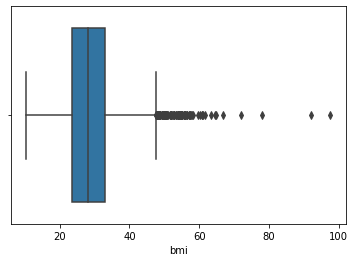

In [3]:
sns.boxplot(x='bmi', data=data_orig)

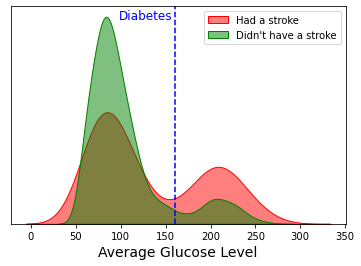

In [127]:
# avg_glucose_level distribution plot 

sns.kdeplot(data_orig.query('stroke == 1')['avg_glucose_level'], color = 'red', shade = True, label = 'Had a stroke', alpha = 0.5)
sns.kdeplot(data_orig.query('stroke == 0')['avg_glucose_level'], color = 'green', shade = True, label = "Didn't have a stroke", 
            alpha = 0.5)
plt.axvline(x = 160, color = 'b', linestyle = '--')
plt.text(98, 0.016, "Diabetes", size= 12, color = 'b')
plt.ylabel('')
plt.xlabel('Average Glucose Level', fontsize=14)
plt.yticks([])
plt.legend(loc = 'upper right')

In [29]:
# use bim median value to replace the missing value
data_orig['bmi'].fillna(data_orig['bmi'].median(), inplace=True)

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'BMI')

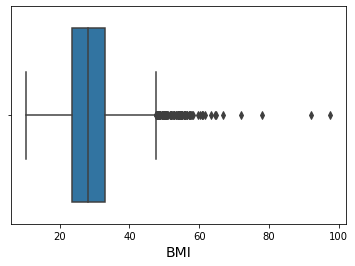

In [30]:
# box plot forbmi

sns.boxplot(data.bmi)
plt.xlabel('BMI', fontsize=14)

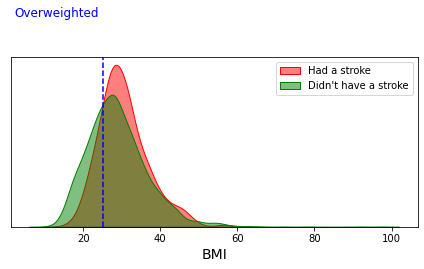

In [24]:
# bmi distribution plot 

sns.kdeplot(data_orig.query('stroke == 1')['bmi'], color = 'red', shade = True, label = 'Had a stroke', alpha = 0.5)
sns.kdeplot(data_orig.query('stroke == 0')['bmi'], color = 'green', shade = True, label = "Didn't have a stroke", alpha = 0.5)
plt.axvline(x = 25, color = 'b', linestyle = '--')
plt.text(2, 0.091,"Overweighted", size= 12, color = 'b')
plt.ylabel('')
plt.xlabel('BMI', fontsize=14)
plt.yticks([])
plt.tight_layout()
plt.legend(loc = 'upper right')

Text(0.5, 0, 'Patient Type')

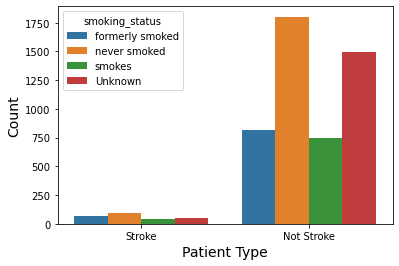

In [25]:
# bar plot for smoking_status

sns.countplot(x='stroke', hue='smoking_status', data=data)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Patient Type', fontsize=14)

([<matplotlib.patches.Wedge at 0x182c366c548>,
 [Text(0.4849148987626202, 1.0427643746110806, 'Never Smoked'),
  Text(-1.1499084697362485, -0.014509005094756432, 'Formerly Smoked'),
  Text(-0.09420514020419349, -1.1461349796420612, 'Unknown'),
  Text(0.9922820919619186, -0.581271236146843, 'Smokes')],
 [Text(0.23191582114734008, 0.49871339655312547, '36.1%'),
  Text(-0.5499562246564667, -0.00693908939314438, '28.1%'),
  Text(-0.0450546322715708, -0.5481515120027249, '18.9%'),
  Text(0.47456969615570016, -0.2779992868528379, '16.9%')])

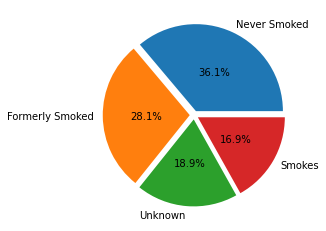

In [26]:
# pie chart for poeple with different smoking status

plt.pie(data_orig.query('stroke == 1').smoking_status.value_counts(), autopct="%.1f%%", labels=['Never Smoked', 'Formerly Smoked', 'Unknown', 'Smokes'],
        pctdistance=0.5, explode=[0.05]*4)

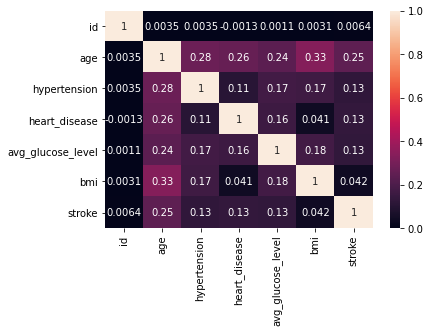

In [27]:
# heatmap

corr = data_orig.corr()
ax = sns.heatmap(corr, vmin=0, vmax=1, annot=True)

In [7]:
data_orig.bmi.describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

## 5. Data Preprocessing and Feature Engineering

In [38]:
# make a copy

df = data_orig.copy()

In [39]:
# drop id and gender=Other

drop_index = df[df.gender=='Other'].index
df.drop(columns=['id'], inplace=True)
df.drop(index=drop_index, inplace=True)
df.shape

(5109, 11)

In [40]:
# reset index

df.reset_index(drop=True)
df.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [41]:
# fill BMI with mean

df.bmi = df.bmi.fillna(df.bmi.mean())
df.bmi.tail()

5105    28.89456
5106    40.00000
5107    30.60000
5108    25.60000
5109    26.20000
Name: bmi, dtype: float64

In [42]:
# Normalize age, avg_glucose_level, and bmi

for col in ['age', 'avg_glucose_level', 'bmi']:
    df[col] = (df[col]-df[col].mean())/df[col].std()
df.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,Female,1.626015,1,0,Yes,Private,Urban,-0.494433,4.614972e-16,never smoked,0
5106,Female,1.670236,0,0,Yes,Self-employed,Urban,0.420881,1.442596e+00,never smoked,0
5107,Female,-0.363940,0,0,Yes,Self-employed,Rural,-0.511216,2.215365e-01,never smoked,0
5108,Male,0.343600,0,0,Yes,Private,Rural,1.328245,-4.279630e-01,formerly smoked,0
5109,Female,0.034051,0,0,Yes,Govt_job,Urban,-0.460647,-3.500231e-01,Unknown,0


In [44]:
# One hot encoding for gender, ever_married, work_type, residence_type, smoking_status

df = pd.get_dummies(df)

In [45]:
df.shape

(5109, 21)

## 6. Machine learning Modelling

In [47]:
# choose X, y
X = df.drop(columns=['stroke'])
y = df.stroke

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [70]:
_model = []
_train_score = []
_test_score = []

In [84]:
# use SMOTE to resample the train data

X_train_res, y_train_res = SMOTE(random_state=0).fit_resample(X_train, y_train.ravel())

### 6.1 Logistic regression

In [78]:
# run grid search for logistic regression
lr = LogisticRegression(class_weight='weighted')
lr_param_grid = {'penalty': ['l1', 'l2'],'C': np.linspace(-4, 4, 20)}
lr_grid = GridSearchCV(estimator=lr, param_grid=lr_param_grid, n_jobs=-1)
lr_grid.fit(X_train, y_train)

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan 0.95424551        nan 0.95400101
        nan 0.95400101        nan 0.95400101        nan 0.95400101
        nan 0.95400101        nan 0.95400101        nan 0.95400101
        nan 0.95400101        nan 0.95400101]
  category=UserWarning


GridSearchCV(estimator=LogisticRegression(class_weight='weighted'), n_jobs=-1,
             param_grid={'C': array([-4.        , -3.57894737, -3.15789474, -2.73684211, -2.31578947,
       -1.89473684, -1.47368421, -1.05263158, -0.63157895, -0.21052632,
        0.21052632,  0.63157895,  1.05263158,  1.47368421,  1.89473684,
        2.31578947,  2.73684211,  3.15789474,  3.57894737,  4.        ]),
                         'penalty': ['l1', 'l2']})

Text(33.0, 0.5, 'True')

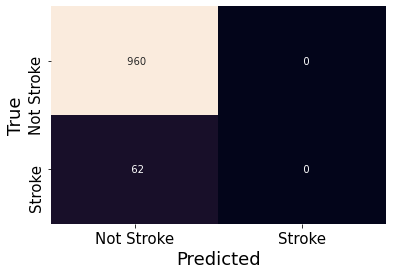

In [93]:
# confusion matrix of lr on original data
y_pred_lr = lr_grid.best_estimator_.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='4d', cbar=None)
plt.xticks([0.5, 1.5],['Not Stroke', 'Stroke'], fontsize=15)
plt.yticks([0.5, 1.5],['Not Stroke', 'Stroke'], fontsize=15)
plt.xlabel('Predicted', fontsize=18)
plt.ylabel('True', fontsize=18)

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan 0.86710269        nan 0.86679144
        nan 0.86543949        nan 0.86561297        nan 0.86556014
        nan 0.86495498        nan 0.86481917        nan 0.86436458
        nan 0.86404192        nan 0.8641551 ]
  category=UserWarning


Text(33.0, 0.5, 'True')

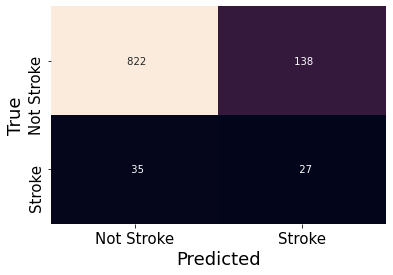

In [100]:
# lr on resampled data

lr_grid_res = GridSearchCV(estimator=LogisticRegression(), param_grid=lr_param_grid, n_jobs=-1, scoring='f1')
lr_grid_res.fit(X_train_res, y_train_res)

y_pred_lr_res = lr_grid_res.best_estimator_.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred_lr_res), annot=True, fmt='4d', cbar=None)
plt.xticks([0.5, 1.5],['Not Stroke', 'Stroke'], fontsize=15)
plt.yticks([0.5, 1.5],['Not Stroke', 'Stroke'], fontsize=15)
plt.xlabel('Predicted', fontsize=18)
plt.ylabel('True', fontsize=18)

In [101]:
f1_score(y_test, y_pred_lr_res)

0.23788546255506607

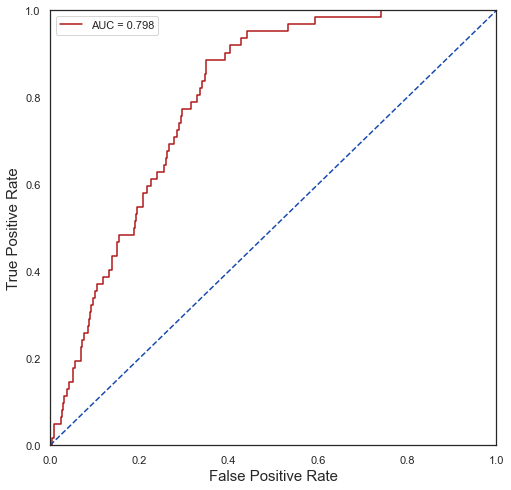

In [142]:
# Roc AUC Curve
y_prob_lr = lr_grid_res.best_estimator_.predict_proba(X_test)[:, 1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob_lr)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.xlim(0,1)
plt.ylim(0,1)
plt.ylabel('True Positive Rate', fontsize=15)
plt.xlabel('False Positive Rate', fontsize=15)
plt.legend()
plt.show()

### 6.2 Random Forest Classifier

In [108]:
# parameters for random forest classifier

rf_param = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
rf_grid = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_param, n_iter=100, n_jobs=-1)
rf_grid_res = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_param, n_iter=100, n_jobs=-1)

In [104]:
rf_grid.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]})

In [106]:
# print the classification report

y_pred_rf = rf_grid.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



Text(33.0, 0.5, 'True')

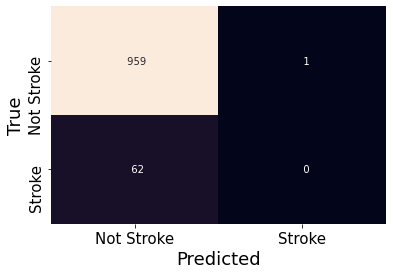

In [107]:
# plot the confusion matrix

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='4d', cbar=None)
plt.xticks([0.5, 1.5],['Not Stroke', 'Stroke'], fontsize=15)
plt.yticks([0.5, 1.5],['Not Stroke', 'Stroke'], fontsize=15)
plt.xlabel('Predicted', fontsize=18)
plt.ylabel('True', fontsize=18)

In [109]:
rf_grid_res.fit(X_train_res, y_train_res)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]})

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       960
           1       0.09      0.06      0.08        62

    accuracy                           0.90      1022
   macro avg       0.52      0.51      0.51      1022
weighted avg       0.89      0.90      0.90      1022



Text(33.0, 0.5, 'True')

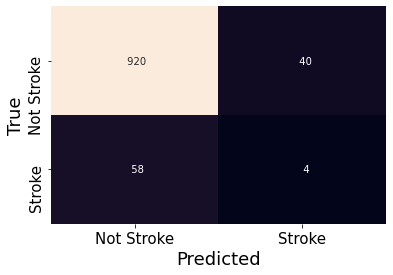

In [110]:
# classification report

y_pred_rf_res = rf_grid_res.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_rf_res))

# plot the confusion matrix

sns.heatmap(confusion_matrix(y_test, y_pred_rf_res), annot=True, fmt='4d', cbar=None)
plt.xticks([0.5, 1.5],['Not Stroke', 'Stroke'], fontsize=15)
plt.yticks([0.5, 1.5],['Not Stroke', 'Stroke'], fontsize=15)
plt.xlabel('Predicted', fontsize=18)
plt.ylabel('True', fontsize=18)

### 6.3 xgboost classifier

In [132]:
# A parameter grid for XGBoost
xgb_params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, use_label_encoder=False, objective='binary:logistic',eval_metric='logloss' )

xgb_grid = RandomizedSearchCV(xgb, param_distributions=xgb_params, n_iter=50, scoring='roc_auc', verbose=3, random_state=10)

In [133]:
xgb_grid.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=5, subsample=0.8; total time=   1.6s
[CV 2/5] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=5, subsample=0.8; total time=   1.6s
[CV 3/5] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=5, subsample=0.8; total time=   1.6s
[CV 4/5] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=5, subsample=0.8; total time=   1.6s
[CV 5/5] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=5, subsample=0.8; total time=   1.6s
[CV 1/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8; total time=   1.5s
[CV 2/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8; total time=   1.5s
[CV 3/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8; total time=   1.5s
[CV 4/5] END colsample_bytree=0.6, gamma=0.5

[CV 4/5] END colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=10, subsample=0.8; total time=   1.7s
[CV 5/5] END colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=10, subsample=0.8; total time=   1.7s
[CV 1/5] END colsample_bytree=1.0, gamma=2, max_depth=4, min_child_weight=1, subsample=1.0; total time=   2.0s
[CV 2/5] END colsample_bytree=1.0, gamma=2, max_depth=4, min_child_weight=1, subsample=1.0; total time=   1.8s
[CV 3/5] END colsample_bytree=1.0, gamma=2, max_depth=4, min_child_weight=1, subsample=1.0; total time=   1.8s
[CV 4/5] END colsample_bytree=1.0, gamma=2, max_depth=4, min_child_weight=1, subsample=1.0; total time=   1.8s
[CV 5/5] END colsample_bytree=1.0, gamma=2, max_depth=4, min_child_weight=1, subsample=1.0; total time=   1.7s
[CV 1/5] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=10, subsample=1.0; total time=   1.9s
[CV 2/5] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=10, subsample=1.0; total time=   1.

[CV 3/5] END colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=5, subsample=0.6; total time=   1.6s
[CV 4/5] END colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=5, subsample=0.6; total time=   1.6s
[CV 5/5] END colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=5, subsample=0.6; total time=   1.4s
[CV 1/5] END colsample_bytree=1.0, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6; total time=   2.2s
[CV 2/5] END colsample_bytree=1.0, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6; total time=   2.1s
[CV 3/5] END colsample_bytree=1.0, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6; total time=   2.1s
[CV 4/5] END colsample_bytree=1.0, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6; total time=   2.1s
[CV 5/5] END colsample_bytree=1.0, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6; total time=   2.2s
[CV 1/5] END colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=5, subsample=1.0; total time

[CV 1/5] END colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=10, subsample=1.0; total time=   1.9s
[CV 2/5] END colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=10, subsample=1.0; total time=   2.2s
[CV 3/5] END colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=10, subsample=1.0; total time=   2.0s
[CV 4/5] END colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=10, subsample=1.0; total time=   2.0s
[CV 5/5] END colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=10, subsample=1.0; total time=   2.0s
[CV 1/5] END colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=1, subsample=0.6; total time=   1.8s
[CV 2/5] END colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=1, subsample=0.6; total time=   1.9s
[CV 3/5] END colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=1, subsample=0.6; total time=   2.0s
[CV 4/5] END colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=1, subsample=0.6; total time=   2

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           eval_metric='logloss', gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=0.02,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           scale_pos_weight=Non

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       960
           1       0.18      0.27      0.22        62

    accuracy                           0.88      1022
   macro avg       0.57      0.60      0.58      1022
weighted avg       0.90      0.88      0.89      1022



Text(33.0, 0.5, 'True')

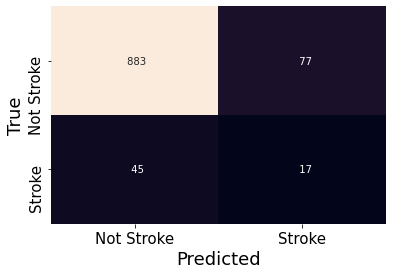

In [134]:
# classification report

y_pred_xgb_res = xgb_grid.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_xgb_res))

# plot the confusion matrix

sns.heatmap(confusion_matrix(y_test, y_pred_xgb_res), annot=True, fmt='4d', cbar=None)
plt.xticks([0.5, 1.5],['Not Stroke', 'Stroke'], fontsize=15)
plt.yticks([0.5, 1.5],['Not Stroke', 'Stroke'], fontsize=15)
plt.xlabel('Predicted', fontsize=18)
plt.ylabel('True', fontsize=18)

In [143]:
f1_score(y_test, y_pred_xgb_res)

0.21794871794871798

In [138]:
y_prob = xgb_grid.best_estimator_.predict_proba(X_test)[:,1]
print(f'ROC_AUC Score is {roc_auc_score(y_test, y_prob):.2f}')

ROC_AUC Score is 0.81


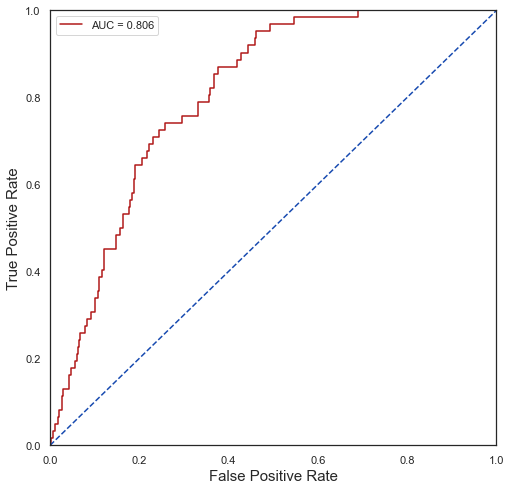

In [141]:
# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.xlim(0,1)
plt.ylim(0,1)
plt.ylabel('True Positive Rate', fontsize=15)
plt.xlabel('False Positive Rate', fontsize=15)
plt.legend()
plt.show()